In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
# loading the dataset into a data frame
data=pd.read_csv('bollywood.csv')

In [3]:
# making copy of dataset for backup
data_copy=data.copy()

In [4]:
# checking first 5 records of dataset
data.head()

,SlNo,Release Date,MovieName,ReleaseTime,Genre,Budget,BoxOfficeCollection,YoutubeViews,YoutubeLikes,YoutubeDislikes
0,1,18-Apr-14,2 States,LW,Romance,36,104.00,8576361,26622,2527
1,2,4-Jan-13,Table No. 21,N,Thriller,10,12.00,1087320,1129,137
2,3,18-Jul-14,Amit Sahni Ki List,N,Comedy,10,4.00,572336,586,54
3,4,4-Jan-13,Rajdhani Express,N,Drama,7,0.35,42626,86,19
4,5,4-Jul-14,Bobby Jasoos,N,Comedy,18,10.80,3113427,4512,1224


In [5]:
# checking last 5 records of dataset
data.tail()

,SlNo,Release Date,MovieName,ReleaseTime,Genre,Budget,BoxOfficeCollection,YoutubeViews,YoutubeLikes,YoutubeDislikes
144,145,27-Feb-15,Dum Laga Ke Haisha,N,Comedy,15,30.00,3250917,8185,615
145,146,13-Mar-15,NH10,N,Thriller,13,32.10,5592977,15464,1513
146,147,20-Mar-15,Dilliwali Zaalim Girlfriend,N,Comedy,32,12.00,2316047,4289,807
147,148,20-Mar-15,Hunterrr,N,Comedy,5,11.89,4674795,3706,762
148,149,23-May-14,Kochadaiiyaan,HS,Action,150,120.00,4740727,13466,2649


In [6]:
# checking columns(list) of the dataset
list(data.columns)

['SlNo',
 'Release Date',
 'MovieName',
 'ReleaseTime',
 'Genre',
 'Budget',
 'BoxOfficeCollection',
 'YoutubeViews',
 'YoutubeLikes',
 'YoutubeDislikes']

In [7]:
# shape of the data i.e. rows and columns
data.shape

(149, 10)

In [8]:
# rows in a data
data.shape[0]

149

In [9]:
# length of a data i.e. number of records
len(data)

149

In [10]:
# metadata of dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   SlNo                 149 non-null    int64  
 1   Release Date         149 non-null    object 
 2   MovieName            149 non-null    object 
 3   ReleaseTime          149 non-null    object 
 4   Genre                149 non-null    object 
 5   Budget               149 non-null    int64  
 6   BoxOfficeCollection  149 non-null    float64
 7   YoutubeViews         149 non-null    int64  
 8   YoutubeLikes         149 non-null    int64  
 9   YoutubeDislikes      149 non-null    int64  
dtypes: float64(1), int64(5), object(4)
memory usage: 11.8+ KB


### Observations:
- There are 149 records (rows) and 10 columns.
- Out of 10 columns 4 are categorical (object) type and rest are continuous variables.
- There are no null values

In [11]:
# basic statistics data of the dataset
data.describe()

,SlNo,Budget,BoxOfficeCollection,YoutubeViews,YoutubeLikes,YoutubeDislikes
count,149.000000,149.000000,149.000000,1.490000e+02,149.000000,149.000000
mean,75.000000,29.442953,55.667248,3.337920e+06,7877.536913,1207.818792
std,43.156691,28.237981,94.494531,3.504407e+06,12748.047191,1852.692938
min,1.000000,2.000000,0.010000,4.354000e+03,1.000000,1.000000
25%,38.000000,11.000000,8.780000,1.076591e+06,1377.000000,189.000000
50%,75.000000,21.000000,28.000000,2.375050e+06,4111.000000,614.000000
75%,112.000000,35.000000,57.450000,4.550051e+06,9100.000000,1419.000000
max,149.000000,150.000000,735.000000,2.317107e+07,101275.000000,11888.000000


In [12]:
# checking the null values if any
data.isna().sum()

SlNo                   0
Release Date           0
MovieName              0
ReleaseTime            0
Genre                  0
Budget                 0
BoxOfficeCollection    0
YoutubeViews           0
YoutubeLikes           0
YoutubeDislikes        0
dtype: int64

In [13]:
# different genres in consideration
data['Genre'].unique()

array(['Romance', 'Thriller ', 'Comedy', ' Drama ', 'Action ', 'Action',
       'Thriller'], dtype=object)

## How many movies got released in each genre

In [14]:
data['Genre'].value_counts()

Genre
Comedy       36
 Drama       35
Thriller     26
Romance      25
Action       21
Thriller      3
Action        3
Name: count, dtype: int64

In [15]:
data['Genre'].value_counts().sort_values(ascending=True)

Genre
Thriller      3
Action        3
Action       21
Romance      25
Thriller     26
 Drama       35
Comedy       36
Name: count, dtype: int64

### Observations:

- Comedy has the highest number of releases.
- Action and Thriller have the least number of releases.

## How many movies in each genre got released in different release time


In [16]:
pd.crosstab(data['Genre'],data['ReleaseTime'])

ReleaseTime,FS,HS,LW,N
Genre,,,,
Drama,4,6,1,24
Action,3,3,3,12
Action,0,0,0,3
Comedy,3,5,5,23
Romance,3,3,4,15
Thriller,4,1,1,20
Thriller,0,0,1,2


## Which month of the year, maximum number of movie releases are seen

In [17]:
data['Month']=data['Release Date'].str.split('-').str[1]

In [18]:
data.head()

,SlNo,Release Date,MovieName,ReleaseTime,Genre,Budget,BoxOfficeCollection,YoutubeViews,YoutubeLikes,YoutubeDislikes,Month
0,1,18-Apr-14,2 States,LW,Romance,36,104.00,8576361,26622,2527,Apr
1,2,4-Jan-13,Table No. 21,N,Thriller,10,12.00,1087320,1129,137,Jan
2,3,18-Jul-14,Amit Sahni Ki List,N,Comedy,10,4.00,572336,586,54,Jul
3,4,4-Jan-13,Rajdhani Express,N,Drama,7,0.35,42626,86,19,Jan
4,5,4-Jul-14,Bobby Jasoos,N,Comedy,18,10.80,3113427,4512,1224,Jul


In [19]:
data['Month'].value_counts().index[0]

'Jan'

#### January is the month when most of the movies are released!

## Which month of the year, sees most of high budgeted (>=25) movie releases 

In [20]:
data[data['Budget']>=25]['Month'].sort_values(ascending=False)[0]

'Apr'

#### April is the month with most high budgeted movies

## Is there correlation between box office collection and youtube likes?

In [21]:
data['BoxOfficeCollection'].corr(data['YoutubeLikes'])

0.6825165877731297

#### Yes there is positive and moderately high correlation between box office collection and youtube likes.

## Which genre of movies get more YouTube likes?

In [22]:
data.loc[data['YoutubeLikes'].argmax(),'Genre']

'Action'

#### Action genre got the maximum Youtube likes as also indicated in the box plot below!

<Axes: xlabel='YoutubeLikes', ylabel='Genre'>

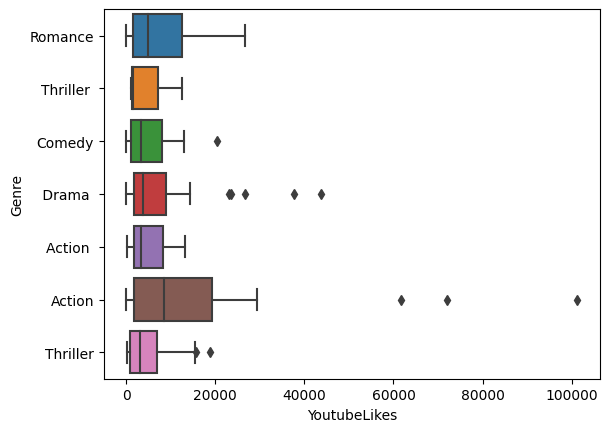

In [23]:
sns.boxplot(x=data['YoutubeLikes'], y=data['Genre'])

## Heatmap of multiple columns

In [24]:
columns_to_consider=data[['Budget','BoxOfficeCollection','YoutubeViews','YoutubeLikes','YoutubeDislikes']]

<Axes: >

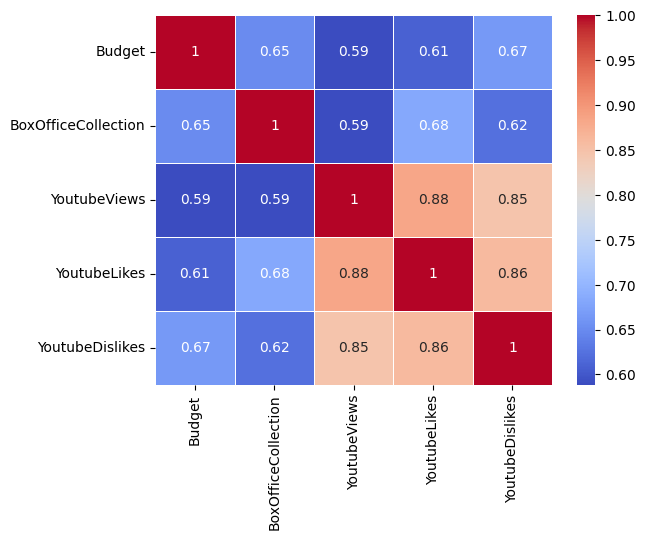

In [25]:
sns.heatmap(columns_to_consider.corr(), annot=True, cmap='coolwarm', linewidths=.5 )

#### 'YoutubeViews','YoutubeLikes','YoutubeDislikes' are highly correlated (positively) with eachother, having correlation in the range of 0.85 to 0.88. 
The others are moderately correlated with eachother with values ranging from 0.59 to 0.67

### Top 10 movies with max return on investment

In [26]:
roi=(data['BoxOfficeCollection']-data['Budget'])/data['Budget']

In [27]:
max_roi_index=roi.sort_values(ascending=False).index[0:10]

In [28]:
data.loc[max_roi_index,'MovieName']

64                    Aashiqui 2
89                            PK
132                  Grand Masti
135                 The Lunchbox
87                        Fukrey
58                      Mary Kom
128                       Shahid
37     Humpty Sharma Ki Dulhania
101           Bhaag Milkha Bhaag
115              Chennai Express
Name: MovieName, dtype: object

In [29]:
data.loc[max_roi_index,['MovieName','ReleaseTime']]

,MovieName,ReleaseTime
64,Aashiqui 2,N
89,PK,HS
132,Grand Masti,LW
135,The Lunchbox,N
87,Fukrey,N
58,Mary Kom,N
128,Shahid,FS
37,Humpty Sharma Ki Dulhania,N
101,Bhaag Milkha Bhaag,N
115,Chennai Express,FS


In [30]:
data['roi']=roi

In [31]:
data.groupby('ReleaseTime')['roi'].mean().sort_values(ascending=False)

ReleaseTime
LW    1.127205
FS    0.973853
HS    0.850867
N     0.657722
Name: roi, dtype: float64

#### average ROI is higher when movie is released on Long weekend

## Distribution of movie budget

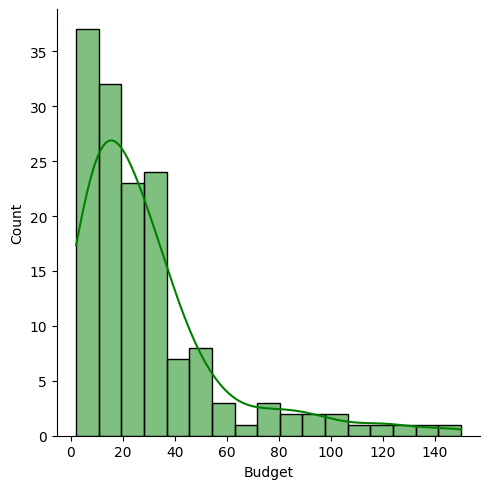

In [32]:
sns.displot(data['Budget'], kde=True, color='green')

#### Observation:

- Most of the movies are in the low to mid budgeted range.
- The distribution is right skew indicating outliers are on the right side.
- Few movies are made that have high budgets.

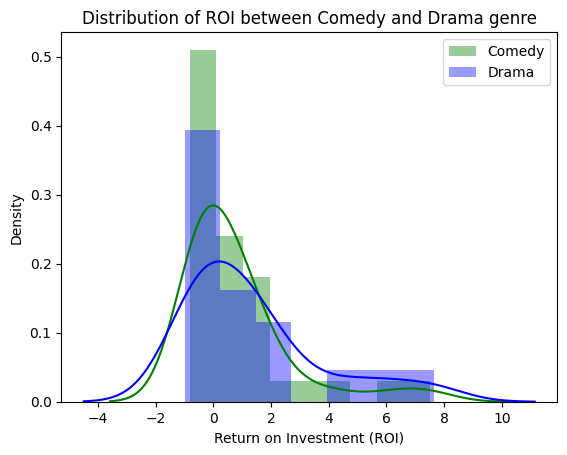

In [33]:
sns.distplot(data[data['Genre']=='Comedy']['roi'], kde=True, color='green', label='Comedy')
sns.distplot(data[data['Genre']==' Drama ']['roi'], kde=True, color='blue', label='Drama')
plt.xlabel('Return on Investment (ROI)')
plt.ylabel('Density')
plt.title('Distribution of ROI between Comedy and Drama genre')
plt.legend()
plt.show()

#### Observations:
- drama genre generates higher roi 